In [1]:
import matplotlib.pyplot as plt
import pymongo
import numpy as np
import pandas as pd
import json
from bson import json_util, ObjectId
import re
import ast
import seaborn as sns
import matplotlib.dates as mdates
import itertools
import networkx as nx
from collections import Counter
from operator import itemgetter
import matplotlib.pyplot as plt
import math
import powerlaw

In [59]:
DG = nx.read_graphml("GRAPHS/2019-12_graph.graphml")
DG.remove_node('R')
DG2 = max(nx.weakly_connected_components(DG), key=len)
SG = DG.subgraph(DG2)
nx.info(SG)

'Name: \nType: DiGraph\nNumber of nodes: 13838\nNumber of edges: 66574\nAverage in degree:   4.8110\nAverage out degree:   4.8110'

In [16]:
TG = nx.read_graphml("TG.graphml")
nx.info(TG)

'Name: \nType: DiGraph\nNumber of nodes: 13838\nNumber of edges: 381998\nAverage in degree:  27.6050\nAverage out degree:  27.6050'

In [2]:
TG_nobase = nx.read_graphml("TG_nobase.graphml")
nx.info(TG_nobase)

'Name: \nType: DiGraph\nNumber of nodes: 12686\nNumber of edges: 274449\nAverage in degree:  21.6340\nAverage out degree:  21.6340'

In [8]:
def centralidades(TG, SG, n = 10):
    degree_centrality = nx.degree_centrality(TG)
    DC = {k: v for k, v in sorted(degree_centrality.items(), 
                              key=lambda item: item[1], reverse = True)}
    
    print('Degree Centrality')
    for x in list(DC)[0:n]:
        print("key {}, value {} ".format(x,  DC[x]))
        print("DD: " + str(SG.in_degree(x)))
        print("TD: " + str(TG.in_degree(x)))
        print("v: " + str(TG.in_degree(x)/len(list(TG.nodes()))))
    

In [15]:
centralidades(TG, SG, 21)

Degree Centrality
key methods, value 0.8165064681650646 
DD: 2876
TD: 11298
v: 0.816447463506287
key utils, value 0.8092071980920719 
DD: 2436
TD: 11197
v: 0.8091487209134268
key stats, value 0.7665678976656789 
DD: 3953
TD: 10607
v: 0.7665125018066195
key grDevices, value 0.6722555467225554 
DD: 1210
TD: 9302
v: 0.6722069663246134
key graphics, value 0.6448652164486521 
DD: 1962
TD: 8923
v: 0.6448186154068507
key Rcpp, value 0.5301004553010045 
DD: 1786
TD: 7333
v: 0.5299176181529123
key grid, value 0.500831105008311 
DD: 440
TD: 6930
v: 0.5007949125596184
key lattice, value 0.4865939148659391 
DD: 400
TD: 6728
v: 0.486197427373898
key tools, value 0.4417865144178651 
DD: 261
TD: 6113
v: 0.44175458881341234
key magrittr, value 0.4158415841584158 
DD: 930
TD: 5754
v: 0.4158115334585923
key Matrix, value 0.4072414540724145 
DD: 874
TD: 5628
v: 0.4067061714120538
key glue, value 0.3810074438100744 
DD: 175
TD: 5271
v: 0.38090764561352797
key MASS, value 0.3792006937920069 
DD: 1461
TD: 5

In [14]:
centralidades(TG_nobase, SG, 21)

Degree Centrality
key Rcpp, value 0.5780843515963737 
DD: 1786
TD: 7333
v: 0.5780387829102949
key magrittr, value 0.4536066219944817 
DD: 930
TD: 5754
v: 0.4535708655210468
key glue, value 0.4155301537248719 
DD: 175
TD: 5271
v: 0.41549739870723634
key digest, value 0.40701616081986597 
DD: 215
TD: 5163
v: 0.40698407693520416
key R6, value 0.40007883326763893 
DD: 262
TD: 5075
v: 0.40004729623206686
key rlang, value 0.3945605045329129 
DD: 612
TD: 5005
v: 0.3945294024909349
key pkgconfig, value 0.3765076862435948 
DD: 7
TD: 4776
v: 0.3764780072520889
key crayon, value 0.370674024438313 
DD: 172
TD: 4702
v: 0.37064480529717797
key assertthat, value 0.36484036263303116 
DD: 205
TD: 4628
v: 0.3648116033422671
key stringi, value 0.36444619629483643 
DD: 177
TD: 4623
v: 0.3644174680750434
key backports, value 0.3625541978715018 
DD: 29
TD: 4599
v: 0.36252561879236955
key ellipsis, value 0.3542767047694127 
DD: 12
TD: 4493
v: 0.3541699511272269
key vctrs, value 0.3514387071344107 
DD: 14
TD:

In [57]:
n=0
m=0
for item in dataout:
    if item <10:
        n=n+1
    if item >200:
        m=m+1
print(n,m)

5329 6


In [55]:
n=0
m=0
for item in datain:
    if item <10:
        n=n+1
    if item >200:
        m=m+1
print(n,m)

12895 193


/home/mmora/anaconda3/lib/python3.7/site-packages/powerlaw.py:700: RuntimeWarning: invalid value encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))
Values less than or equal to 0 in data. Throwing out 0 or negative values
/home/mmora/anaconda3/lib/python3.7/site-packages/powerlaw.py:700: RuntimeWarning: invalid value encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))
Values less than or equal to 0 in data. Throwing out 0 or negative values
/home/mmora/anaconda3/lib/python3.7/site-packages/powerlaw.py:700: RuntimeWarning: invalid value encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))


1.0


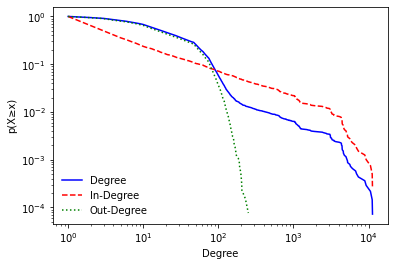

In [48]:
data = sorted([d for n, d in TG.degree], reverse=True)
datain = sorted([d for n, d in TG.in_degree], reverse=True)
dataout = sorted([d for n, d in TG.out_degree], reverse=True)

fit = powerlaw.Fit(data, discrete=True,xmin=1)
####
FigCCDFmax = fit.plot_ccdf(color='b',linestyle='-', label=r"Degree")
#fit.power_law.plot_pdf(color='b', linestyle='--', ax=FigCCDFmax, label=r"Degree Fit")
fit = powerlaw.Fit(datain, discrete=True,xmin=1)
fit.plot_ccdf(color='r', linestyle='--', label=r"In-Degree")
fit = powerlaw.Fit(dataout, discrete=True,xmin=1)
print(fit.xmin)
fit.plot_ccdf(color='g', linestyle='dotted', label=r"Out-Degree")
#fit.power_law.plot_pdf(color='r', linestyle='--', ax=FigCCDFmax, label=r"In-Degree Fit")
####
FigCCDFmax.set_ylabel(u"p(X≥x)")
FigCCDFmax.set_xlabel(r"Degree")
handles, labels = FigCCDFmax.get_legend_handles_labels()
leg = FigCCDFmax.legend(handles, labels, loc=3)
leg.draw_frame(False)

figname = 'FigInOut'
plt.savefig(figname+'.eps', bbox_inches='tight')

Values less than or equal to 0 in data. Throwing out 0 or negative values
Calculating best minimal value for power law fit
/home/mmora/anaconda3/lib/python3.7/site-packages/powerlaw.py:700: RuntimeWarning: invalid value encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))
/home/mmora/anaconda3/lib/python3.7/site-packages/powerlaw.py:700: RuntimeWarning: divide by zero encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))
/home/mmora/anaconda3/lib/python3.7/site-packages/powerlaw.py:700: RuntimeWarning: invalid value encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))


NameError: name 'savefig' is not defined

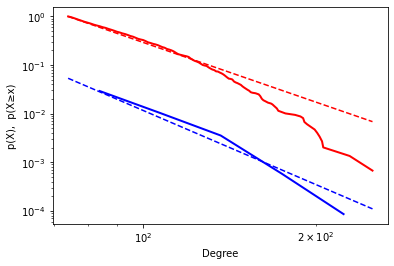

In [29]:
fit = powerlaw.Fit(dataout, discrete=True)
####
figCCDF = fit.plot_pdf(color='b', linewidth=2)
fit.power_law.plot_pdf(color='b', linestyle='--', ax=figCCDF)
fit.plot_ccdf(color='r', linewidth=2, ax=figCCDF)
fit.power_law.plot_ccdf(color='r', linestyle='--', ax=figCCDF)
####
figCCDF.set_ylabel(u"p(X),  p(X≥x)")
figCCDF.set_xlabel(r"Degree")

figname = 'FigCCDF'
savefig(figname+'.eps', bbox_inches='tight')
#savefig(figname+'.tiff', bbox_inches='tight', dpi=300)

In [44]:
fit.xmin


74.0

In [85]:
def dependientes(TG, SG, n = 10):
    outd = TG.out_degree()
    outd = sorted(outd, key=lambda x: x[1], reverse=True)
    
    print('Out Degree')
    for x in list(outd)[0:n]:
        print(x[0])
        print("DD: " + str(SG.out_degree(x[0])))
        print("TD: " + str(TG.out_degree(x[0])))
        print("v: " + str(TG.out_degree(x[0])/len(list(TG.nodes()))))

In [86]:
dependientes(TG, SG, 20)

Out Degree
smartdata
DD: 24
TD: 251
v: 0.018138459314929904
ggstatsplot
DD: 27
TD: 229
v: 0.01654863419569302
psychNET
DD: 23
TD: 206
v: 0.014886544298309004
KNNShiny
DD: 9
TD: 205
v: 0.014814279520161873
STAT
DD: 9
TD: 203
v: 0.014669749963867612
CLUSTShiny
DD: 8
TD: 201
v: 0.014525220407573348
bootnet
DD: 26
TD: 199
v: 0.014380690851279087
biospear
DD: 18
TD: 193
v: 0.0139471021823963
mdsOpt
DD: 7
TD: 193
v: 0.0139471021823963
KarsTS
DD: 22
TD: 191
v: 0.013802572626102037
SemNeT
DD: 17
TD: 190
v: 0.013730307847954907
rangeModelMetadata
DD: 18
TD: 190
v: 0.013730307847954907
PREPShiny
DD: 5
TD: 188
v: 0.013585778291660645
psycho
DD: 26
TD: 184
v: 0.01329671917907212
GmAMisc
DD: 31
TD: 177
v: 0.012790865732042203
RcmdrPlugin.RiskDemo
DD: 4
TD: 172
v: 0.012429541841306548
fdm2id
DD: 36
TD: 172
v: 0.012429541841306548
jsmodule
DD: 35
TD: 171
v: 0.012357277063159417
treespace
DD: 22
TD: 171
v: 0.012357277063159417
EGAnet
DD: 21
TD: 168
v: 0.012140482728718023


In [76]:
outd = TG.out_degree()

In [84]:
sorted(outd, key=lambda x: x[1], reverse=True)

[('smartdata', 251),
 ('ggstatsplot', 229),
 ('psychNET', 206),
 ('KNNShiny', 205),
 ('STAT', 203),
 ('CLUSTShiny', 201),
 ('bootnet', 199),
 ('biospear', 193),
 ('mdsOpt', 193),
 ('KarsTS', 191),
 ('SemNeT', 190),
 ('rangeModelMetadata', 190),
 ('PREPShiny', 188),
 ('psycho', 184),
 ('GmAMisc', 177),
 ('RcmdrPlugin.RiskDemo', 172),
 ('fdm2id', 172),
 ('jsmodule', 171),
 ('treespace', 171),
 ('EGAnet', 168),
 ('SpaDES', 168),
 ('adiv', 168),
 ('dartR', 168),
 ('dlookr', 167),
 ('NetLogoR', 165),
 ('PWFSLSmoke', 164),
 ('networktools', 163),
 ('CAWaR', 162),
 ('cops', 161),
 ('graph4lg', 161),
 ('JFE', 160),
 ('SpaDES.addins', 160),
 ('multicross', 160),
 ('statVisual', 160),
 ('HierDpart', 159),
 ('lilikoi', 159),
 ('wilson', 159),
 ('IIS', 157),
 ('hilldiv', 157),
 ('momentuHMM', 155),
 ('fieldRS', 154),
 ('CGPfunctions', 153),
 ('diceR', 153),
 ('onemap', 153),
 ('statsExpressions', 152),
 ('radiant', 152),
 ('RcmdrPlugin.BiclustGUI', 150),
 ('missCompare', 150),
 ('neuropsychology',